In [2]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import MaxPool2D, Conv2D, BatchNormalization, Dense, Flatten, Dropout, Activation
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
import pandas as pd
import glob
import cv2
import wfdb
import os
import biosppy
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [23]:
def get_records():

    paths = glob.glob('data/mitdb/*.atr')

    paths = [path[:-4] for path in paths]
    paths.sort()

    return paths

def beat_annotations(annotation):
    
    good = ['N']   
    ids = np.in1d(annotation.symbol, good)
    beats = annotation.sample[ids]

    return beats
  
def segmentation(records):
    Normal = []
    for e in records:
        signals, fields = wfdb.rdsamp(e, channels = [0]) 

        ann = wfdb.rdann(e, 'atr')
        good = ['N']
        ids = np.in1d(ann.symbol, good)
        imp_beats = ann.sample[ids]
        beats = (ann.sample)
        for i in imp_beats:
            beats = list(beats)
            j = beats.index(i)
            if(j!=0 and j!=(len(beats)-1)):
                x = beats[j-1]
                y = beats[j+1]
                diff1 = abs(x - beats[j])//2
                diff2 = abs(y - beats[j])//2
                Normal.append(signals[beats[j] - diff1: beats[j] + diff2, 0])
                print(signal)
                break
    return Normal

In [60]:
def find_peaks(sig):
    if len(sig) == 0:
        return np.empty([0]), np.empty([0])

    tmp = sig[1:]
    tmp = np.append(tmp, [sig[-1]])
    tmp = sig - tmp
    tmp[np.where(tmp>0)] = 1
    tmp[np.where(tmp==0)] = 0
    tmp[np.where(tmp<0)] = -1
    tmp2 = tmp[1:]
    tmp2 = np.append(tmp2, [0])
    tmp = tmp-tmp2

    hard_peaks = np.where(np.logical_or(tmp==-2, tmp==+2))[0] + 1
    soft_peaks = []

    for iv in np.where(np.logical_or(tmp==-1,tmp==+1))[0]:
        t = tmp[iv]
        i = iv+1
        while True:
            if i==len(tmp) or tmp[i] == -t or tmp[i] == -2 or tmp[i] == 2:
                break
            if tmp[i] == t:
                soft_peaks.append(int(iv + (i - iv)/2))
                break
            i += 1
    soft_peaks = np.array(soft_peaks, dtype='int') + 1

    return hard_peaks, soft_peaks

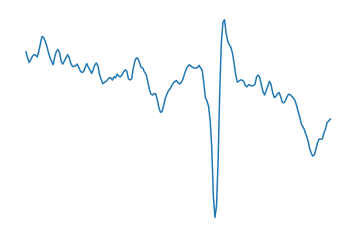

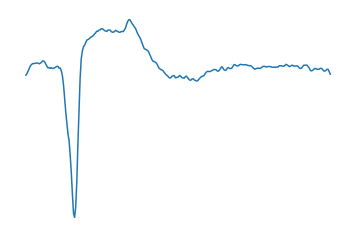

In [45]:
array = signals
directory = "data"
for count, i in enumerate(array):
  fig = plt.figure(frameon=False)
  plt.plot(i) 
  plt.xticks([]), plt.yticks([])
  for spine in plt.gca().spines.values():
     spine.set_visible(False)

  filename = directory + '/' + str(count)+'.png'
  fig.savefig(filename)
  im_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
  im_gray = cv2.resize(im_gray, (128, 128), interpolation = cv2.INTER_LANCZOS4)
  cv2.imwrite(filename, im_gray)

In [3]:
def cropping(image, filename):
    
    #Left Top Crop
    datadir = os.path.join("img",filename)
    crop = image[:96, :96]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(filename[:-4] + 'leftTop' + '.png', crop)
    
    #Center Top Crop
    crop = image[:96, 16:112]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(datadir[:-4] + 'centerTop' + '.png', crop)
    
    #Right Top Crop
    crop = image[:96, 32:]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(datadir[:-4] + 'rightTop' + '.png', crop)
    
    #Left Center Crop
    crop = image[16:112, :96]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(datadir[:-4] + 'leftCenter' + '.png', crop)
    
    #Center Center Crop
    crop = image[16:112, 16:112]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(datadir[:-4] + 'centerCenter' + '.png', crop)
    
    #Right Center Crop
    crop = image[16:112, 32:]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(datadir[:-4] + 'rightCenter' + '.png', crop)
    
    #Left Bottom Crop
    crop = image[32:, :96]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(datadir[:-4] + 'leftBottom' + '.png', crop)
    
    #Center Bottom Crop
    crop = image[32:, 16:112]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(datadir[:-4] + 'centerBottom' + '.png', crop)
    
    #Right Bottom Crop
    crop = image[32:, 32:]
    crop = cv2.resize(crop, (128, 128))
    cv2.imwrite(datadir[:-4] + 'rightBottom' + '.png', crop)


In [4]:
model = Sequential()

model.add(Conv2D(64, (3,3),strides = (1,1), input_shape = (128,128,1),kernel_initializer='glorot_uniform'))

model.add(Activation('relu'))

model.add(BatchNormalization())

model.add(Conv2D(64, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(Activation('relu'))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(Conv2D(128, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(Activation('relu'))

model.add(BatchNormalization())

model.add(Conv2D(128, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(Activation('relu'))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(Conv2D(256, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(Activation('relu'))

model.add(BatchNormalization())

model.add(Conv2D(256, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(Activation('relu'))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(Flatten())

model.add(Dense(2048))

model.add(Activation('relu'))

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 64)      640       
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
activation_2 (Activation)    (None, 124, 124, 64)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 124, 124, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
__________

In [24]:
paths = get_records()
paths1 = []
print(paths[0])
paths1.append(paths[0])
paths1.append(paths[1])
print(paths1)

data/mitdb/100
['data/mitdb/100', 'data/mitdb/101']


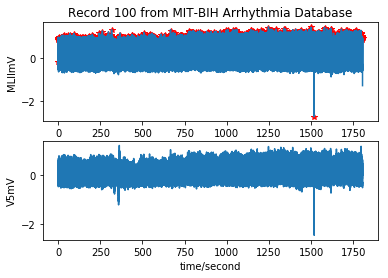

(650000, 2)

ValueError: operands could not be broadcast together with shapes (650000,2) (1300000,) 

In [61]:
e = 'data/mitdb/100'
record = wfdb.rdrecord(e) 

ann = wfdb.rdann(e, 'atr')
wfdb.plot_wfdb(record=record, annotation=ann,
       title='Record 100 from MIT-BIH Arrhythmia Database',
       time_units='seconds')
records1 = record.p_signal



display(records1.shape)
h,l=find_peaks(records1)
print(h)
# good = ['N']
# ids = np.in1d(ann.symbol, good)
# imp_beats = ann.sample[ids]
# beats = (ann.sample)
# Normal = []
# for i in imp_beats:
#     beats = list(beats)
#     j = beats.index(i)
#     if(j!=0 and j!=(len(beats)-1)):
#         x = beats[j-1]
#         y = beats[j+1]
#         diff1 = abs(x - beats[j])//2
#         diff2 = abs(y - beats[j])//2
#         Normal.append(records1[beats[j] - diff1: beats[j] + diff2, 0])

# with open('my_file.txt', 'w') as f:
#     for l in Normal[0]:
        
#         f.write(str(l)+'\n')
# print(Normal)
# print(data)
# signals = []
# count = 1
# peaks =  biosppy.signals.ecg.christov_segmenter(signal=data, sampling_rate = 200)[0]
# for i in (peaks[1:-1]):
#     diff1 = abs(peaks[count - 1] - i)
#     diff2 = abs(peaks[count + 1]- i)
#     x = peaks[count - 1] + diff1//2
#     y = peaks[count + 1] - diff2//2
#     signal = data[x:y]
#     signals.append(signal)
#     count += 1

In [31]:
Normal[0]

array([-0.26 , -0.265, -0.275, -0.305, -0.32 , -0.33 , -0.32 , -0.32 ,
       -0.315, -0.34 , -0.35 , -0.335, -0.32 , -0.31 , -0.335, -0.345,
       -0.35 , -0.35 , -0.355, -0.35 , -0.35 , -0.37 , -0.36 , -0.345,
       -0.325, -0.325, -0.335, -0.37 , -0.4  , -0.4  , -0.395, -0.35 ,
       -0.21 , -0.01 ,  0.245,  0.53 ,  0.85 ,  1.085,  1.065,  0.815,
        0.48 ,  0.21 , -0.01 , -0.145, -0.185, -0.24 , -0.285, -0.285,
       -0.285, -0.29 , -0.3  , -0.335, -0.36 , -0.36 , -0.385, -0.395,
       -0.415, -0.43 , -0.435, -0.405, -0.41 , -0.405, -0.415, -0.44 ,
       -0.43 , -0.415, -0.42 , -0.415, -0.42 , -0.43 , -0.44 , -0.425,
       -0.415, -0.425, -0.43 , -0.425, -0.415, -0.42 , -0.415, -0.42 ,
       -0.42 , -0.435, -0.415, -0.415, -0.4  , -0.395, -0.41 , -0.425,
       -0.415, -0.405, -0.395, -0.4  , -0.41 , -0.42 , -0.41 , -0.395,
       -0.38 , -0.39 , -0.4  , -0.415, -0.42 , -0.385, -0.375, -0.38 ,
       -0.375, -0.365, -0.35 , -0.35 , -0.35 , -0.34 , -0.35 , -0.35 ,
      

In [25]:
normal = segmentation(paths1)

# for l in normal:
#     with open('your_file.txt', 'w') as f:
#         for item in l:
#             f.write("%s\n" % item)
#     break

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [14]:
temp = []
norm = np.array(normal)
for l in normal:
    temp = l.reshape(70,70)
    a.append(temp)

ValueError: cannot resize this array: it does not own its data

In [44]:
csv_data = pd.read_csv('sample.csv')

In [10]:
img = cv2.imread("data/0.png")

In [11]:
cropping(img,"break")

In [12]:
director = "img"
temp_list = []
for l in os.listdir(director):
    temp_array = cv2.imread(os.path.join(director,l),cv2.IMREAD_GRAYSCALE)
    temp_list.append(temp_array)

In [13]:
img_array = np.array(temp_list).reshape(-1,128,128,1)

In [14]:
img_array.shape

(8, 128, 128, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'keys'